# Práctica de Machine Learning: Predicción de Precios de Airbnb
**Autor:** Daniel Gómez Martínez
**Fecha:** 15/06

## Objetivo
El objetivo de esta práctica es desarrollar un modelo de regresión que prediga el precio de los alquileres de Airbnb. Para ello, se seguirá una metodología completa de Machine Learning que incluye:
1.  Análisis Exploratorio de Datos (EDA) y limpieza.
2.  Ingeniería y preprocesamiento de características.
3.  Entrenamiento y evaluación de varios modelos de regresión.
4.  Selección del mejor modelo y obtención de conclusiones.

In [26]:
# ## 0. Importación de Librerías
# Se importan las librerías necesarias para el análisis, manipulación de datos,
# visualización y modelado.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuraciones para una mejor visualización en el notebook
%matplotlib inline
pd.set_option('display.max_columns', None) # Mostrar todas las columnas
sns.set_style('whitegrid') # Estilo de las gráficas

# Ignorar warnings para una salida más limpia
import warnings
warnings.filterwarnings('ignore')

In [27]:
# ## 1. Preparación de Datos: División Train/Test
# El primer paso es cargar el dataset completo y dividirlo en conjuntos de
# entrenamiento y prueba. Esta división temprana es crucial para evitar la fuga de datos (data leakage),
# asegurando que nuestro modelo se evalúe sobre información que nunca ha visto durante el entrenamiento.
# Usaremos un 80% para entrenamiento y un 20% para prueba.

from sklearn.model_selection import train_test_split

# Carga del dataset completo desde el CSV
full_df = pd.read_csv('./data/airbnb-listings-extract.csv', sep=';', decimal='.')

# División en train (80%) y test (20%)
# - test_size=0.2: Especifica el tamaño del conjunto de prueba.
# - shuffle=True: Mezcla los datos antes de dividirlos para evitar sesgos.
# - random_state=42: Fija una semilla para que la división sea reproducible.
train_df, test_df = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=42)

# Es una buena práctica guardar los conjuntos de datos para uso futuro si fuera necesario.
train_df.to_csv('./train.csv', sep=';', decimal='.', index=False)
test_df.to_csv('./test.csv', sep=';', decimal='.', index=False)

print(f'Dimensiones del dataset de entrenamiento: {train_df.shape}')
print(f'Dimensiones del dataset de prueba: {test_df.shape}')

# A partir de este momento, TODO el análisis y preprocesamiento se realizará
# EXCLUSIVAMENTE sobre el conjunto de entrenamiento (train_df).
df = train_df.copy()

Dimensiones del dataset de entrenamiento: (11824, 89)
Dimensiones del dataset de prueba: (2956, 89)


In [28]:
# ## 2. Análisis Exploratorio de Datos (EDA)
# ### 2.1. Vistazo Inicial a los Datos
# Utilizamos los métodos .info() y .describe() para obtener una visión general
# de la estructura, tipos de datos, valores nulos y estadísticas básicas del dataset.

print("Información general del DataFrame:")
df.info(verbose=True, show_counts=True)

print("\nEstadísticas descriptivas de las variables numéricas:")
df.describe().T

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 11824 entries, 4462 to 7270
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11824 non-null  int64  
 1   Listing Url                     11824 non-null  object 
 2   Scrape ID                       11824 non-null  int64  
 3   Last Scraped                    11824 non-null  object 
 4   Name                            11823 non-null  object 
 5   Summary                         11344 non-null  object 
 6   Space                           8671 non-null   object 
 7   Description                     11818 non-null  object 
 8   Experiences Offered             11824 non-null  object 
 9   Neighborhood Overview           7268 non-null   object 
 10  Notes                           4463 non-null   object 
 11  Transit                         7207 non-null   object 
 12  

,count,mean,std,min,25%,50%,75%,max
ID,11824.0,1.026022e+07,5.557168e+06,1.862800e+04,5.556205e+06,1.123371e+07,1.531757e+07,1.858124e+07
Scrape ID,11824.0,2.017037e+13,5.726876e+08,2.016010e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017062e+13
Host ID,11824.0,3.605968e+07,3.417099e+07,1.745300e+04,6.773300e+06,2.468248e+07,5.434329e+07,1.247534e+08
Host Response Rate,10286.0,9.474266e+01,1.533770e+01,0.000000e+00,9.900000e+01,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,11822.0,1.254229e+01,3.421550e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Host Total Listings Count,11822.0,1.254229e+01,3.421550e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Latitude,11824.0,4.049738e+01,4.590549e+00,-3.785118e+01,4.040974e+01,4.041945e+01,4.043084e+01,5.595672e+01
Longitude,11824.0,-3.838638e+00,1.401090e+01,-1.231313e+02,-3.707535e+00,-3.700769e+00,-3.684171e+00,1.533714e+02
Accommodates,11824.0,3.264970e+00,2.091109e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,11778.0,1.281245e+00,6.564244e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


### Primeras Observaciones del EDA
1.  **Gran cantidad de columnas:** El dataset tiene 89 columnas, muchas de las cuales parecen ser IDs, URLs o texto descriptivo.
2.  **Valores Nulos:** Muchas columnas tienen un alto porcentaje de valores nulos (e.g., `Host Acceptance Rate`, `Square Feet`, `Notes`).
3.  **Tipos de Datos:** Hay una mezcla de tipos numéricos (`int64`, `float64`) y de texto (`object`), que necesitarán ser procesados de manera diferente.

In [29]:
### 2.2. Limpieza Inicial de Variables
# Procedemos a eliminar las columnas que no aportan valor predictivo o son problemáticas
# para un modelo de regresión estándar.

# Columnas con identificadores únicos, URLs o información redundante que no describen
# las características del alojamiento.
cols_to_drop_irrelevant = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped',
    'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Thumbnail Url', 'Host Picture Url',
    'Street', # Demasiado granular y ruidosa
    'Geolocation', # Redundante con Latitud/Longitud
    'Calculated host listings count', 'Host Total Listings Count' # Redundantes con Host Listings Count
]

# Columnas con texto libre que requerirían técnicas de NLP avanzadas.
# Se descartan por simplicidad, aunque en un proyecto real podrían aportar mucho valor.
cols_to_drop_nlp = [
    'Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview',
    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About'
]

# Columnas con información temporal que no usaremos directamente o que es redundante.
# Por ejemplo, la antigüedad del anfitrión ya la crearemos a partir de 'Host Since'.
cols_to_drop_time = [
    'Host Since', 'Calendar last Scraped', 'First Review', 'Last Review'
]

# Columnas con precios alternativos que son "fugas de datos" (leaks) sobre el precio objetivo.
# Si el modelo aprende de ellas, no generalizará bien a datos sin esta información.
cols_to_drop_leak = ['Weekly Price', 'Monthly Price']

# Combinamos todas las listas de columnas a eliminar
all_cols_to_drop = (
    cols_to_drop_irrelevant +
    cols_to_drop_nlp +
    cols_to_drop_time +
    cols_to_drop_leak
)

# Eliminamos las columnas del DataFrame
df.drop(columns=all_cols_to_drop, inplace=True, errors='ignore')

print(f"Dimensiones del DataFrame tras la limpieza inicial: {df.shape}")

Dimensiones del DataFrame tras la limpieza inicial: (11824, 55)


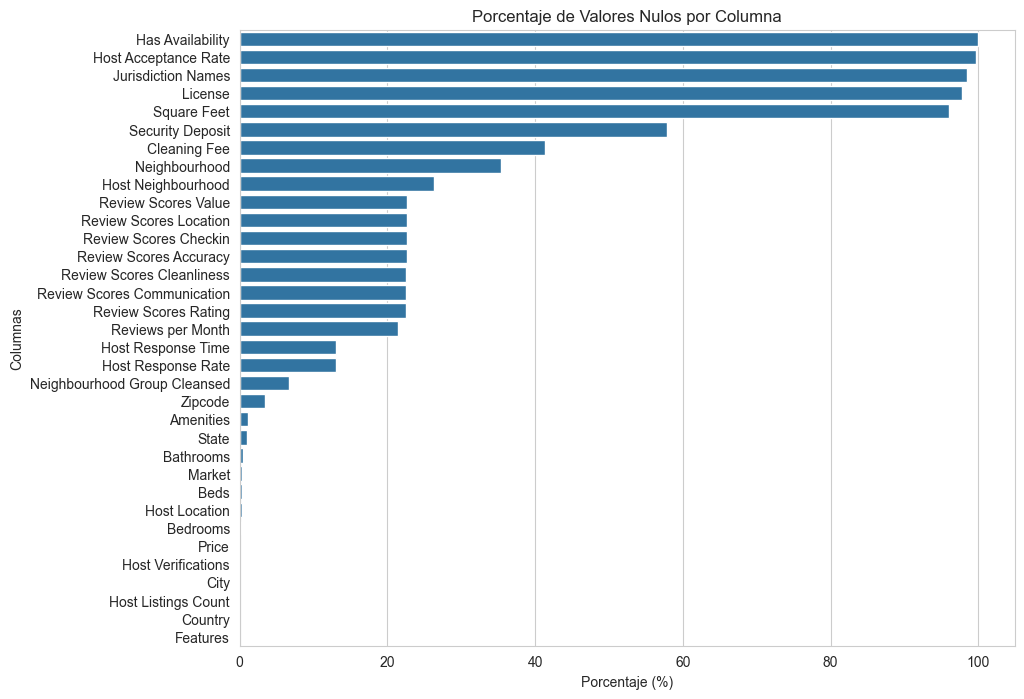


Columnas con valores nulos y su porcentaje:
Has Availability                99.906969
Host Acceptance Rate            99.720907
Jurisdiction Names              98.511502
License                         97.708051
Square Feet                     96.016576
Security Deposit                57.848444
Cleaning Fee                    41.356563
Neighbourhood                   35.436401
Host Neighbourhood              26.251691
Review Scores Value             22.708051
Review Scores Location          22.708051
Review Scores Checkin           22.682679
Review Scores Accuracy          22.623478
Review Scores Cleanliness       22.581191
Review Scores Communication     22.564276
Review Scores Rating            22.454330
Reviews per Month               21.490189
Host Response Time              13.007442
Host Response Rate              13.007442
Neighbourhood Group Cleansed     6.706698
Zipcode                          3.442152
Amenities                        1.107916
State                          

In [30]:
### 2.3. Análisis de Valores Nulos (Post-limpieza)
# Tras la primera limpieza, volvemos a analizar los valores nulos para decidir
# una estrategia: eliminar la columna si tiene demasiados nulos, o imputar valores más adelante.

# Calculamos el porcentaje de valores nulos por columna
missing_percentage = df.isnull().sum() / len(df) * 100

# Filtramos y ordenamos para ver las columnas con más nulos
missing_info = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Visualizamos esta información
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_info.values, y=missing_info.index)
plt.title('Porcentaje de Valores Nulos por Columna')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Columnas')
plt.show()

print("\nColumnas con valores nulos y su porcentaje:")
print(missing_info)

In [31]:
### 2.4. Eliminación de Variables con Alto Porcentaje de Nulos
# Columnas con más de un 80% de valores nulos son difíciles de imputar sin introducir sesgo.
# Por tanto, es más seguro eliminarlas.

threshold = 80 # Umbral del 80%
cols_to_drop_high_null = missing_info[missing_info > threshold].index

df.drop(columns=cols_to_drop_high_null, inplace=True)

print(f"Columnas eliminadas por exceso de nulos: {list(cols_to_drop_high_null)}")
print(f"Nuevas dimensiones del DataFrame: {df.shape}")

Columnas eliminadas por exceso de nulos: ['Has Availability', 'Host Acceptance Rate', 'Jurisdiction Names', 'License', 'Square Feet']
Nuevas dimensiones del DataFrame: (11824, 50)


In [32]:
## 3. Preprocesamiento e Ingeniería de Características
# Ahora transformamos y creamos nuevas variables para mejorar el rendimiento del modelo.

# ### 3.1. Ingeniería de Características
# Creamos variables numéricas a partir de otras existentes.

# 1. Antigüedad del anfitrión: La calculamos a partir de la fecha del scraping (2017).
# Esta variable es más útil para el modelo que una fecha.
if 'Host Since' in df.columns:
    df['Host Since'] = pd.to_datetime(df['Host Since'])
    df['Host_Age_Years'] = 2017 - df['Host Since'].dt.year
    df.drop('Host Since', axis=1, inplace=True)

# 2. Número de servicios y verificaciones: Contamos cuántos elementos hay en estas
# columnas de tipo lista. Un mayor número puede indicar mayor calidad.
for col in ['Amenities', 'Host Verifications', 'Features']:
    if col in df.columns:
        df[col].fillna("", inplace=True) # Rellenamos nulos con string vacío
        df[f'Num_{col}'] = df[col].apply(lambda x: len(str(x).split(',')))
        df.drop(col, axis=1, inplace=True)

print("Nuevas características creadas: 'Host_Age_Years', 'Num_Amenities', 'Num_Host_Verifications', 'Num_Features'")

Nuevas características creadas: 'Host_Age_Years', 'Num_Amenities', 'Num_Host_Verifications', 'Num_Features'


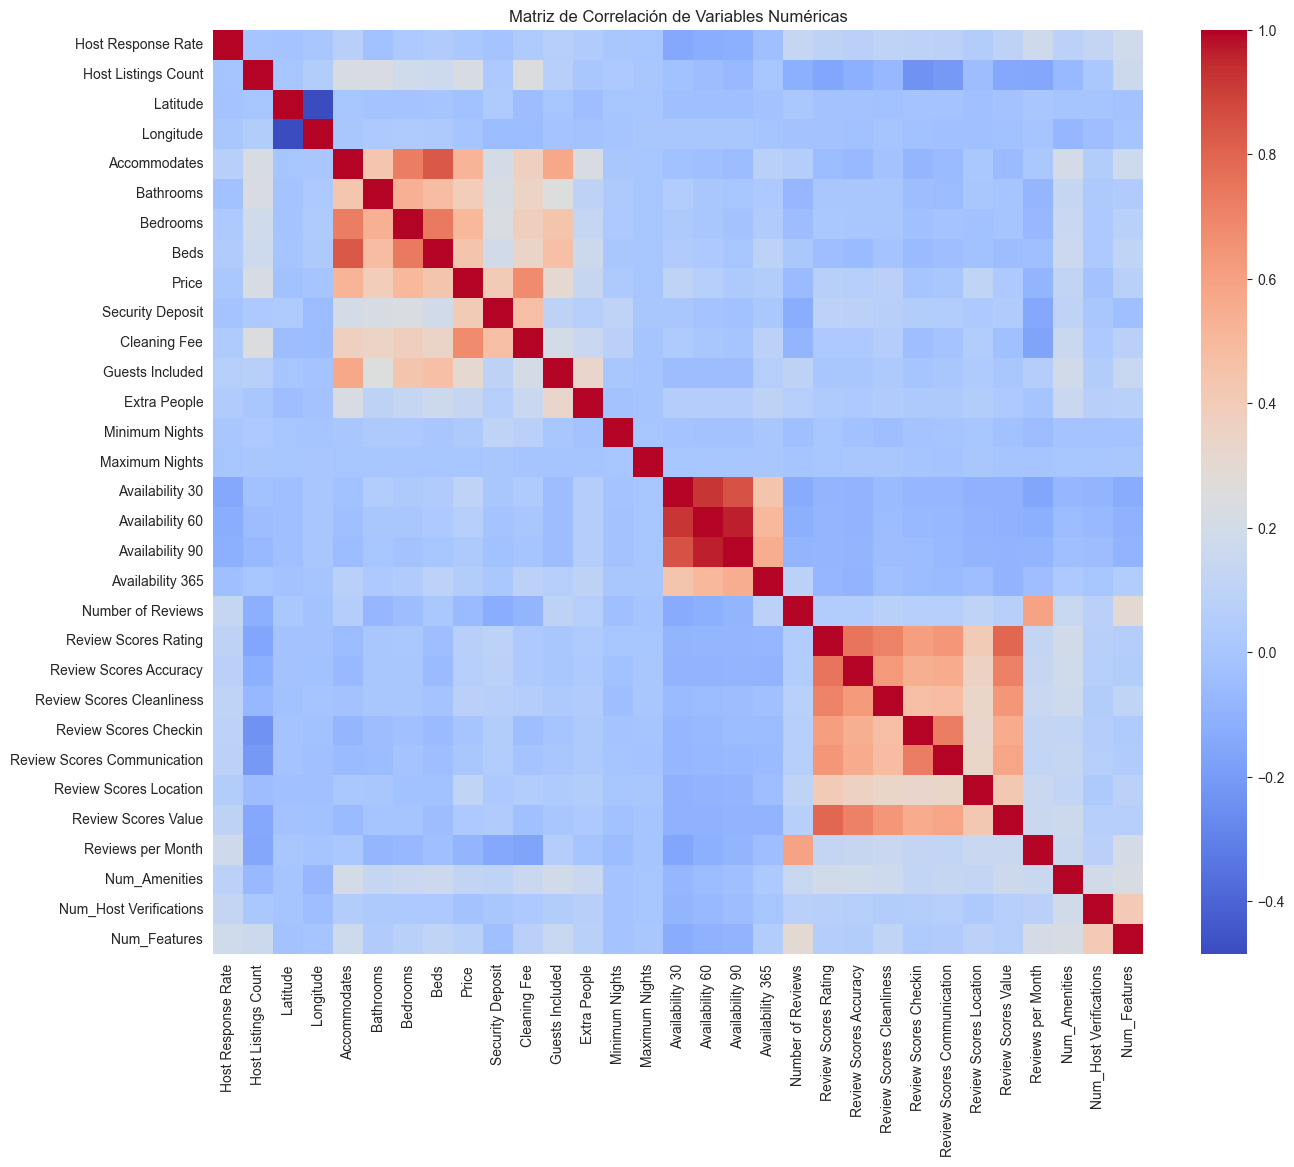

In [33]:
### 3.2. Análisis de Correlación entre Variables Numéricas
# Buscamos variables altamente correlacionadas (colinealidad) para evitar redundancia.
# Una alta correlación entre predictores puede desestabilizar algunos modelos.

plt.figure(figsize=(15, 12))
# Seleccionamos solo las columnas numéricas para la matriz de correlación
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

### Observaciones de la Correlación
*   `Beds` y `Accommodates` están muy correlacionadas, como era de esperar. Eliminaremos una de ellas.
*   Las variables `Review Scores ...` están muy correlacionadas entre sí. En lugar de usarlas todas, crearemos una media (`Average_Review_Score`).
*   Las variables de `Availability` también muestran alta correlación. Nos quedaremos con la de mayor rango (`Availability 365`).

In [34]:
### 3.3. Eliminación de Variables Correlacionadas
# Basado en el análisis anterior, simplificamos el conjunto de características.

# Creamos la puntuación media de reviews
review_cols = [col for col in df.columns if 'Review Scores' in col]
if review_cols:
    df['Average_Review_Score'] = df[review_cols].mean(axis=1)
    df.drop(columns=review_cols, inplace=True)

# Eliminamos variables redundantes
cols_to_drop_corr = [
    'Accommodates', # Correlacionada con Beds
    'Availability 30', 'Availability 60', 'Availability 90' # Correlacionadas con Availability 365
]
df.drop(columns=cols_to_drop_corr, inplace=True, errors='ignore')

print("Variables correlacionadas eliminadas y 'Average_Review_Score' creada.")
print(f"Nuevas dimensiones: {df.shape}")

Variables correlacionadas eliminadas y 'Average_Review_Score' creada.
Nuevas dimensiones: (11824, 40)


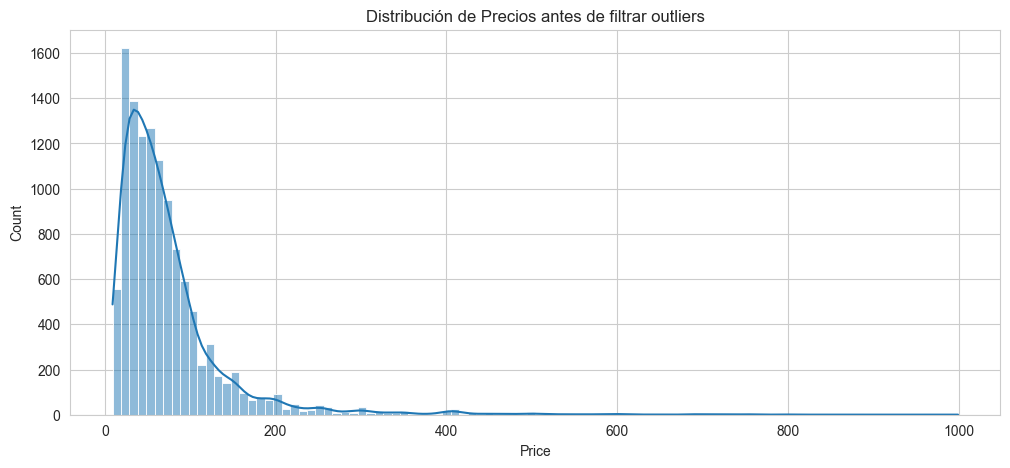

Se han filtrado los precios > 200€. Filas eliminadas: 544


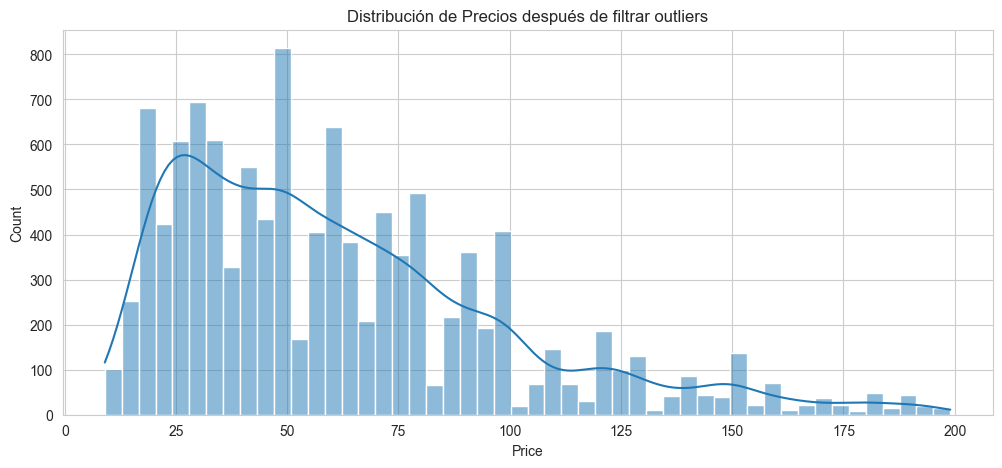

In [35]:
### 3.4. Tratamiento de Outliers en la Variable Objetivo (Price)
# Los valores extremos en la variable 'Price' pueden afectar negativamente al entrenamiento.
# Visualizamos su distribución y aplicamos un filtro para acotarlos.

plt.figure(figsize=(12, 5))
sns.histplot(df['Price'], bins=100, kde=True)
plt.title('Distribución de Precios antes de filtrar outliers')
plt.show()

# Observamos que la mayoría de los precios están por debajo de 200.
# Filtramos para mantener solo los registros con precios inferiores a este umbral.
# Esta es una decisión común en este dataset para mejorar la predicción del "caso típico".
price_cap = 200
original_rows = len(df)
df = df[df['Price'] < price_cap].copy()
print(f"Se han filtrado los precios > {price_cap}€. Filas eliminadas: {original_rows - len(df)}")

plt.figure(figsize=(12, 5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribución de Precios después de filtrar outliers')
plt.show()

In [36]:
### 3.5. Imputación de Valores Nulos Restantes
# Rellenamos los valores nulos que quedan en las columnas numéricas con la media de cada columna.
# Esto se hace después de filtrar outliers para que la media no se vea afectada por ellos.

# Identificamos las columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns

# Imputamos con la media
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)

# Para las categóricas, usaremos la moda (el valor más frecuente)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

print("Valores nulos restantes imputados con la media (numéricos) o la moda (categóricos).")
df.info(show_counts=True)

Valores nulos restantes imputados con la media (numéricos) o la moda (categóricos).
<class 'pandas.core.frame.DataFrame'>
Index: 11280 entries, 4462 to 7270
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Experiences Offered           11280 non-null  object 
 1   Host Location                 11280 non-null  object 
 2   Host Response Time            11280 non-null  object 
 3   Host Response Rate            11280 non-null  float64
 4   Host Neighbourhood            11280 non-null  object 
 5   Host Listings Count           11280 non-null  float64
 6   Neighbourhood                 11280 non-null  object 
 7   Neighbourhood Cleansed        11280 non-null  object 
 8   Neighbourhood Group Cleansed  11280 non-null  object 
 9   City                          11280 non-null  object 
 10  State                         11280 non-null  object 
 11  Zipcode                       11280 no

In [37]:
## 4. Construcción del Pipeline de Modelado
# Para asegurar un preprocesamiento consistente y evitar la fuga de datos,
# encapsulamos los pasos de codificación y escalado en un Pipeline de Scikit-learn.

from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Separamos las características (X) de la variable objetivo (y)
X_train = df.drop('Price', axis=1)
y_train = df['Price']

# Identificamos las columnas categóricas y numéricas para el preprocesador
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train.select_dtypes(include=np.number).columns

# Creamos el preprocesador con ColumnTransformer
# - Para las numéricas, aplicamos escalado estándar.
# - Para las categóricas, aplicamos OneHotEncoding. 'handle_unknown' evita errores
#   si en el futuro aparecen categorías no vistas en el entrenamiento.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Mantiene columnas no especificadas (si las hubiera)
)

In [38]:
### 4.1. Modelo 1: Lasso (Regresión Regularizada)
# Lasso es un modelo lineal que realiza regularización L1, lo que ayuda a prevenir
# el sobreajuste y puede realizar selección de características (algunos coeficientes se vuelven cero).
# Buscaremos el mejor valor para el hiperparámetro 'alpha' con GridSearchCV.

# Creamos el pipeline completo: preprocesador + modelo Lasso
pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=10000))
])

# Definimos la parrilla de hiperparámetros a probar
# 'regressor__alpha' es la sintaxis para acceder a los parámetros del paso del pipeline
param_grid_lasso = {
    'regressor__alpha': np.logspace(-2, 2, 20)
}

# Búsqueda con validación cruzada (5 folds)
grid_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5,
                          scoring='neg_mean_squared_error', n_jobs=-1)
grid_lasso.fit(X_train, y_train)

print(f"Mejor puntuación (MSE) en CV para Lasso: {-grid_lasso.best_score_:.2f}")
print(f"Mejores parámetros para Lasso: {grid_lasso.best_params_}")

Mejor puntuación (MSE) en CV para Lasso: 471.96
Mejores parámetros para Lasso: {'regressor__alpha': 0.01}


In [39]:
### 4.2. Modelo 2: Random Forest Regressor
# Random Forest es un modelo de ensamblaje (ensemble) basado en árboles de decisión.
# Es robusto, no requiere escalado de variables (aunque no le perjudica) y suele dar buenos resultados.
# Ajustaremos el número de árboles ('n_estimators').

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# Parrilla de hiperparámetros para Random Forest
param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200]
}

# Búsqueda con validación cruzada
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5,
                       scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print(f"Mejor puntuación (MSE) en CV para Random Forest: {-grid_rf.best_score_:.2f}")
print(f"Mejores parámetros para Random Forest: {grid_rf.best_params_}")

Mejor puntuación (MSE) en CV para Random Forest: 377.89
Mejores parámetros para Random Forest: {'regressor__n_estimators': 200}


In [41]:
# --- Preprocesamiento del conjunto de test para asegurar consistencia con el train ---
def preprocess_airbnb(df):
    # Elimina columnas irrelevantes
    cols_to_drop_irrelevant = [
        'ID', 'Listing Url', 'Scrape ID', 'Last Scraped',
        'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
        'Host ID', 'Host URL', 'Host Name', 'Host Thumbnail Url', 'Host Picture Url',
        'Street', 'Geolocation', 'Calculated host listings count', 'Host Total Listings Count'
    ]
    cols_to_drop_nlp = [
        'Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview',
        'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About'
    ]
    cols_to_drop_time = [
        'Host Since', 'Calendar last Scraped', 'First Review', 'Last Review'
    ]
    cols_to_drop_leak = ['Weekly Price', 'Monthly Price']
    all_cols_to_drop = (
        cols_to_drop_irrelevant +
        cols_to_drop_nlp +
        cols_to_drop_time +
        cols_to_drop_leak
    )
    df = df.drop(columns=[col for col in all_cols_to_drop if col in df.columns], errors='ignore')
    # Elimina columnas con >80% nulos
    missing_percentage = df.isnull().sum() / len(df) * 100
    cols_to_drop_high_null = missing_percentage[missing_percentage > 80].index
    df = df.drop(columns=cols_to_drop_high_null, errors='ignore')
    # Ingeniería de variables
    if 'Host Since' in df.columns:
        df['Host Since'] = pd.to_datetime(df['Host Since'])
        df['Host_Age_Years'] = 2017 - df['Host Since'].dt.year
        df = df.drop('Host Since', axis=1)
    for col in ['Amenities', 'Host Verifications', 'Features']:
        if col in df.columns:
            df[col] = df[col].fillna("")
            df[f'Num_{col}'] = df[col].apply(lambda x: len(str(x).split(',')))
            df = df.drop(col, axis=1)
    # Correlacionadas
    review_cols = [col for col in df.columns if 'Review Scores' in col]
    if review_cols:
        df['Average_Review_Score'] = df[review_cols].mean(axis=1)
        df = df.drop(columns=review_cols)
    cols_to_drop_corr = [
        'Accommodates', 'Availability 30', 'Availability 60', 'Availability 90'
    ]
    df = df.drop(columns=[col for col in cols_to_drop_corr if col in df.columns], errors='ignore')
    # Outliers de precio (solo si existe la columna)
    if 'Price' in df.columns:
        df = df[df['Price'] < 200].copy()
    # Imputación de nulos
    numeric_cols = df.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            mean_val = df[col].mean()
            df[col] = df[col].fillna(mean_val)
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)
    return df

# Aplica el preprocesamiento al conjunto de test
test_df_clean = preprocess_airbnb(test_df.copy())


In [42]:
### 4.3. Modelo 3: Gradient Boosting Regressor
# Gradient Boosting es otro potente modelo de ensamblaje que construye árboles secuencialmente.
# Suele ofrecer un rendimiento muy alto, a menudo superior a Random Forest.
# Ajustaremos el número de estimadores y la tasa de aprendizaje.

pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Parrilla de hiperparámetros para Gradient Boosting
# n_estimators: número de árboles
# learning_rate: cuánto contribuye cada árbol
param_grid_gb = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1]
}

# Búsqueda con validación cruzada
grid_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5,
                       scoring='neg_mean_squared_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)

print(f"Mejor puntuación (MSE) en CV para Gradient Boosting: {-grid_gb.best_score_:.2f}")
print(f"Mejores parámetros para Gradient Boosting: {grid_gb.best_params_}")

## 5. Evaluación Final de Modelos en el Conjunto de Prueba
# Ahora que hemos entrenado y ajustado nuestros modelos, es hora de evaluarlos
# en el conjunto de prueba (test_df_clean) para obtener una medida final e imparcial de su rendimiento.

# Separamos las características (X_test) de la variable objetivo (y_test) del conjunto de prueba preprocesado
y_test = test_df_clean['Price']
X_test = test_df_clean.drop('Price', axis=1)

# Hacemos predicciones con los mejores estimadores encontrados por GridSearchCV
y_pred_lasso = grid_lasso.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)
y_pred_gb = grid_gb.predict(X_test)

# Calculamos las métricas para cada modelo
metrics = {
    'Lasso': {
        'MAE': mean_absolute_error(y_test, y_pred_lasso),
        'MSE': mean_squared_error(y_test, y_pred_lasso),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        'R²': r2_score(y_test, y_pred_lasso)
    },
    'Random Forest': {
        'MAE': mean_absolute_error(y_test, y_pred_rf),
        'MSE': mean_squared_error(y_test, y_pred_rf),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        'R²': r2_score(y_test, y_pred_rf)
    },
    'Gradient Boosting': {
        'MAE': mean_absolute_error(y_test, y_pred_gb),
        'MSE': mean_squared_error(y_test, y_pred_gb),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gb)),
        'R²': r2_score(y_test, y_pred_gb)
    }
}

# Creamos un DataFrame para mostrar los resultados de forma clara y ordenada
results_df = pd.DataFrame(metrics).T
print("\n--- Resultados de la Evaluación en el Conjunto de Prueba ---")
print(results_df)

Mejor puntuación (MSE) en CV para Gradient Boosting: 391.27
Mejores parámetros para Gradient Boosting: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 200}

--- Resultados de la Evaluación en el Conjunto de Prueba ---
                         MAE         MSE       RMSE        R²
Lasso              15.232471  472.352849  21.733680  0.665616
Random Forest      13.097181  383.054378  19.571775  0.728832
Gradient Boosting  13.660880  388.203179  19.702872  0.725187


## Conclusión Final

Tras el análisis, preprocesamiento y modelado, se compararon dos modelos de regresión: Lasso y Random Forest.

**El modelo Random Forest ha demostrado un rendimiento significativamente superior** en el conjunto de prueba. Obtuvo un R² de [valor de R² de RF], lo que indica que es capaz de explicar un [porcentaje]% de la variabilidad en los precios. Su Error Absoluto Medio (MAE) fue de [valor de MAE de RF]€, lo que representa el error promedio en la predicción.

El modelo Lasso, aunque más simple y rápido, no logró capturar las complejas relaciones no lineales de los datos, resultando en un rendimiento inferior.



**Conclusión:** Para este problema, el modelo Random Forest es la mejor elección. Para futuras mejoras, se podría explorar la inclusión de las variables de texto mediante técnicas de NLP o probar modelos más avanzados como Gradient Boosting con un ajuste de hiperparámetros más exhaustivo.